In [2]:
from hossam import load_data
from matplotlib import pyplot as plt
from matplotlib import font_manager as fm
import seaborn as sb
import numpy as np

In [4]:
my_dpi = 200                                    # 이미지 선명도(100~300)
font_path = "./NotoSansKR-Regular.ttf"          # 한글을 지원하는 폰트 파일의 경로
fm.fontManager.addfont(font_path)               # 폰트의 글꼴을 시스템에 등록함
font_prop = fm.FontProperties(fname=font_path)  # 폰트의 속성을 읽어옴
font_name = font_prop.get_name()                # 읽어온 속성에서 폰트의 이름만 추출     
plt.rcParams['font.family'] = font_name         # 그래프에 한글 폰트 적용
plt.rcParams['font.size'] = 6                   # 기본 폰트크기
plt.rcParams['axes.unicode_minus'] = False      # 그래프에 마이너스 깨짐 방지(한글환경에서 필수)

In [6]:
origin = load_data("icecream")
origin

[data] https://data.hossam.kr/data/lab06/icecream.xlsx
[desc] 기온과 아이스크림 판매량을 기록한 가상의 데이터 (메타데이터,인덱스 없음)
[!] Cannot read metadata


,기온,판매량
0,23,431
1,36,593
2,30,512
3,25,474
4,26,476
5,31,523
6,29,491
7,32,526
8,33,550
9,24,456


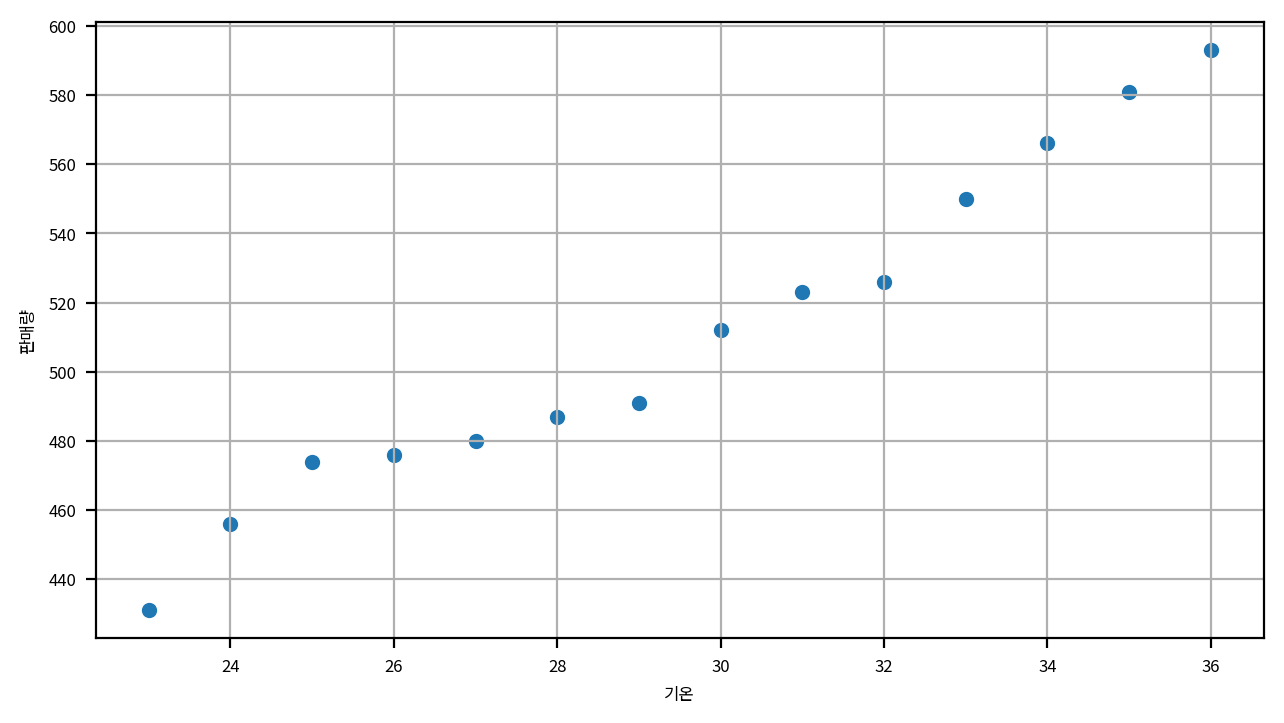

In [8]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.scatterplot(data=origin, x='기온',y='판매량')


ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()

In [15]:
z = np.polyfit(origin['기온'], origin['판매량'],1)
print("상수항:", z[0])
print("계수:", z[1])

상수항: 11.397802197802186
계수: 174.19340659340722


In [19]:
expr = "y = %0.1f * x+ %0.1f" % (z[0], z[1])
expr

'y = 11.4 * x+ 174.2'

In [21]:
f = np.poly1d(z)
f

poly1d([ 11.3978022 , 174.19340659])

In [23]:
x = 40
print("기온이 %d일 경우 아이스크림 판매량은 %f로 예상됩니다."% (x, f(x)))

기온이 40일 경우 아이스크림 판매량은 630.105495로 예상됩니다.


In [25]:
x = origin['기온']
y=f(x)
y

array([436.34285714, 584.51428571, 516.12747253, 459.13846154,
       470.53626374, 527.52527473, 504.72967033, 538.92307692,
       550.32087912, 447.74065934, 561.71868132, 573.11648352,
       481.93406593, 493.33186813])

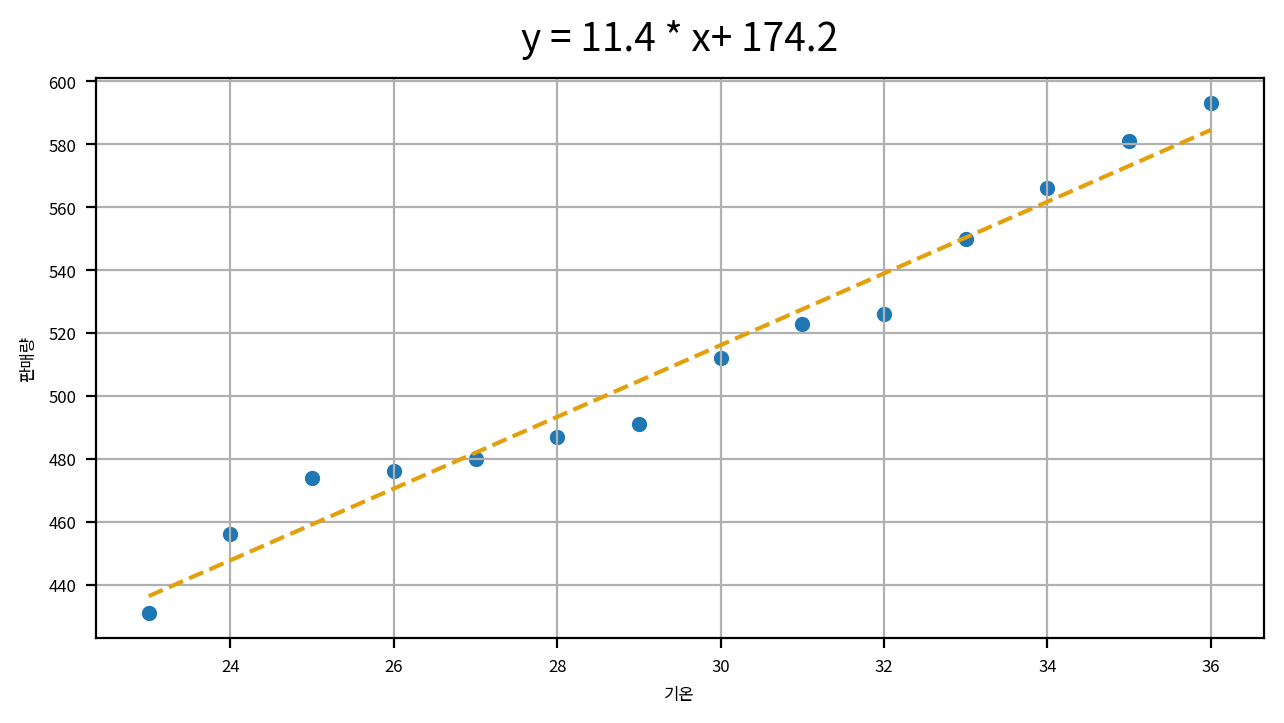

In [27]:
width_px = 1280
height_px = 720
rows = 1
cols = 1
figsize = (width_px/ my_dpi, height_px/ my_dpi)
fig, ax = plt.subplots(rows, cols, figsize=figsize, dpi= my_dpi)

sb.scatterplot(data=origin, x='기온', y='판매량')
sb.lineplot(x=x, y=y, color="#e4a00c", linestyle="--")


ax.set_title(expr, fontsize=14, pad=10)
ax.grid(True)


plt.tight_layout()
plt.show()
plt.close()